In [106]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **1. Template Matching**

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV comes with a function `cv2.matchTemplate()` for this purpose. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. 

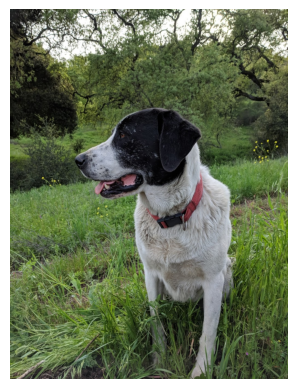

In [107]:
full_img = cv2.imread("./data/sammy.jpg")
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)
plt.imshow(full_img)
plt.axis("off")
plt.show()

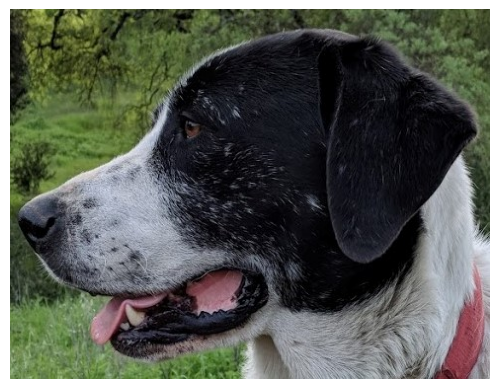

In [108]:
face_img = cv2.imread("./data/sammy_face.jpg")
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
plt.imshow(face_img)
plt.axis("off")
plt.show()

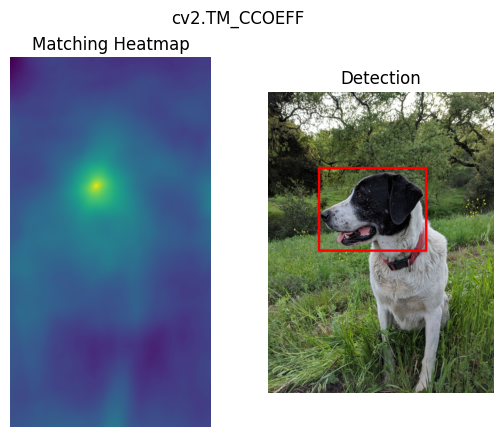

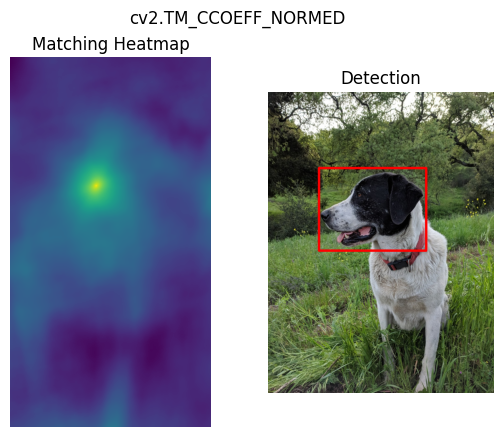

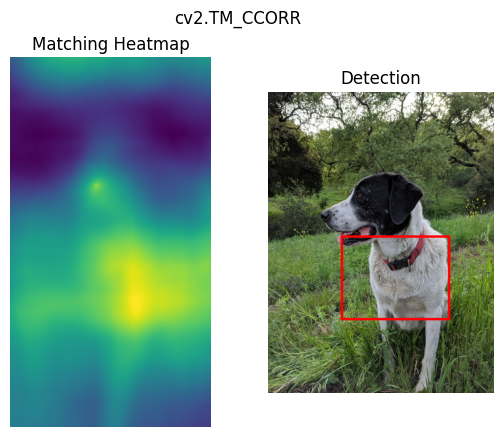

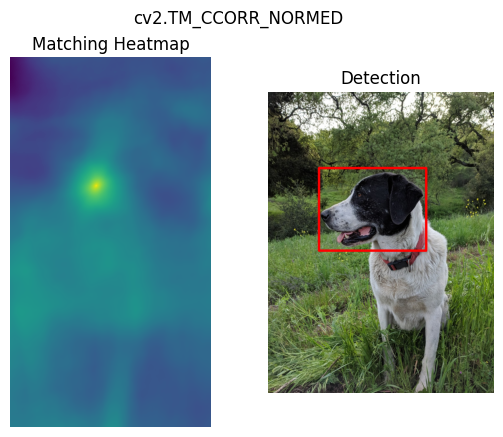

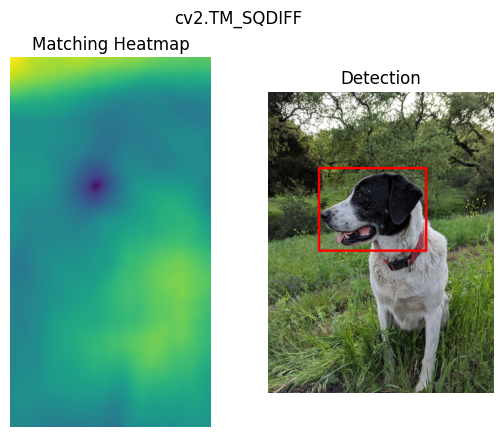

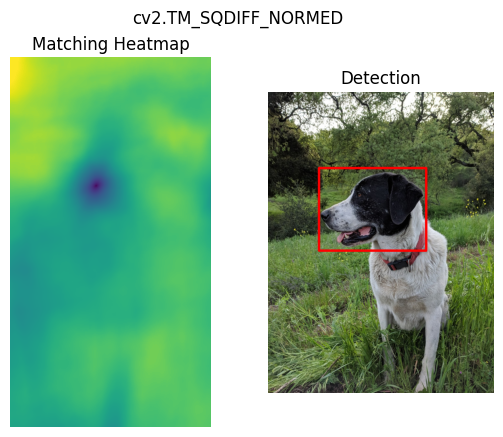

In [109]:
methods = (
    "cv2.TM_CCOEFF",
    "cv2.TM_CCOEFF_NORMED",
    "cv2.TM_CCORR",
    "cv2.TM_CCORR_NORMED",
    "cv2.TM_SQDIFF",
    "cv2.TM_SQDIFF_NORMED",
)

for method in methods:
    full_img_copy = full_img.copy()
    # Get the result of the template matching as a heatmap.
    result = cv2.matchTemplate(full_img_copy, face_img, eval(method))
    # Find the location of the min/max values in the heatmap.
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    top_left = max_loc  # Max due to correlation methods.
    if method in ("cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"):
        top_left = min_loc  # Min due to squared difference methods.

    height, width, channels = face_img.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_img_copy, top_left, bottom_right, (255, 0, 0), 10)

    plt.subplot(121)
    plt.imshow(result)
    plt.title("Matching Heatmap")
    plt.axis("off")

    plt.subplot(122)
    plt.imshow(full_img_copy)
    plt.title("Detection")
    plt.axis("off")

    plt.suptitle(method)
    plt.show()

## **2. Corner Detection**

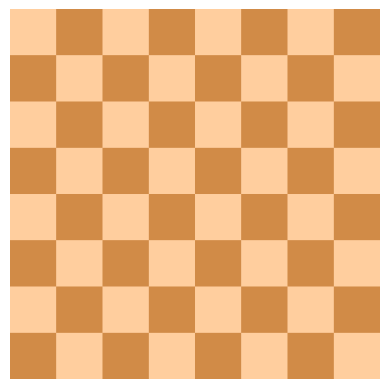

In [110]:
flat_chess = cv2.imread("./data/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)
plt.axis("off")
plt.show()

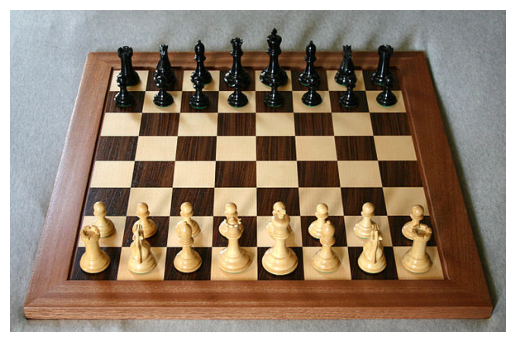

In [111]:
real_chess = cv2.imread("./data/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)
plt.axis("off")
plt.show()

### **2.1. Harris Corner Detection**

Corners are regions in the image with large variation in intensity in all the directions. One early attempt to find these corners was done by Chris Harris & Mike Stephens in their paper A Combined Corner and Edge Detector in 1988, so now it is called the Harris Corner Detector. He took this simple idea to a mathematical form. It basically finds the difference in intensity for a displacement of $(u, v)$ in all directions.

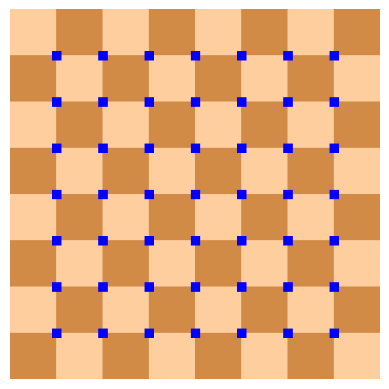

In [112]:
dst = cv2.cornerHarris(
    src=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY),
    blockSize=2,  # Neighborhood window size.
    ksize=3,  # Aperture parameter for the Sobel operator.
    k=0.04,  # Harris detector free parameter.
)
dst = cv2.dilate(dst, kernel=np.ones((7, 7), np.uint8))

flat_chess_copy = flat_chess.copy()
flat_chess_copy[dst > 0.01 * dst.max()] = (0, 0, 255)

plt.imshow(flat_chess_copy)
plt.axis("off")
plt.show()

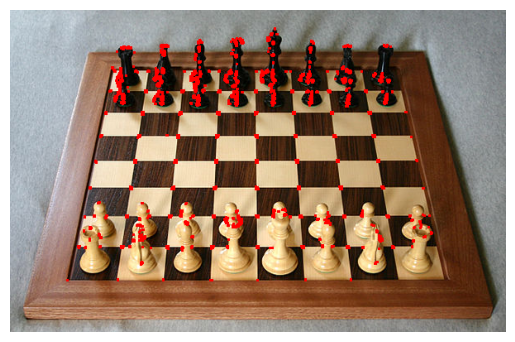

In [113]:
dst = cv2.cornerHarris(
    src=cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY),  # See with median blur.
    blockSize=2,
    ksize=3,
    k=0.04,
)
dst = cv2.dilate(dst, kernel=np.ones((3, 3), np.uint8))

real_chess_copy = real_chess.copy()
real_chess_copy[dst > 0.01 * dst.max()] = (255, 0, 0)

plt.imshow(real_chess_copy)
plt.axis("off")
plt.show()

### **2.2. Shi-Tomasi Corner Detection**

In 1994, J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector. The scoring function in Harris Corner Detector was given by: $R = \lambda_1\lambda_2 - k(\lambda_1 + \lambda_2)^2$. Instead of this, Shi-Tomasi proposed: $R = \min(\lambda_1,\lambda_2)$. If it is a greater than a threshold value, it is considered as a corner. 

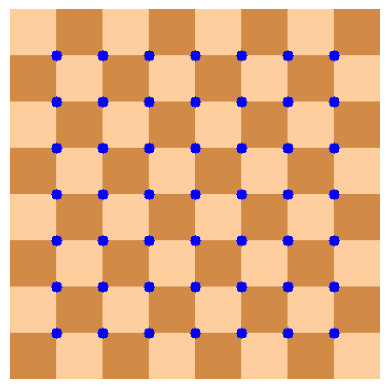

In [114]:
dst = cv2.goodFeaturesToTrack(
    image=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY),
    maxCorners=64,
    qualityLevel=0.01,  # Value between 0-1, which denotes the minimum quality of corner below which everyone is rejected.
    minDistance=10,  # Minimum euclidean distance between corners detected.
)

flat_chess_copy = flat_chess.copy()
for x, y in dst.astype(np.int32).reshape(-1, 2):
    cv2.circle(flat_chess_copy, (x, y), 5, (0, 0, 255), -1)

plt.imshow(flat_chess_copy)
plt.axis("off")
plt.show()

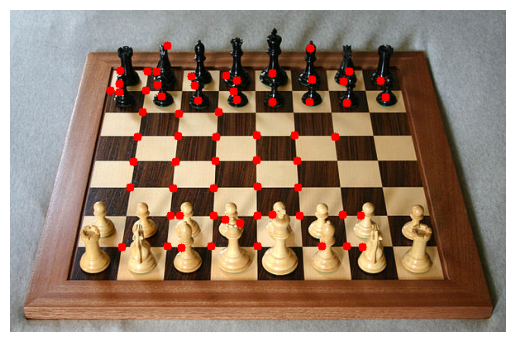

In [115]:
dst = cv2.goodFeaturesToTrack(
    image=cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY),
    maxCorners=64,
    qualityLevel=0.01,  # Value between 0-1, which denotes the minimum quality of corner below which everyone is rejected.
    minDistance=10,  # Minimum euclidean distance between corners detected.
)

real_chess_copy = real_chess.copy()
for x, y in dst.astype(np.int32).reshape(-1, 2):
    cv2.circle(real_chess_copy, (x, y), 5, (255, 0, 0), -1)

plt.imshow(real_chess_copy)
plt.axis("off")
plt.show()

## **3. Canny Edge Detection**

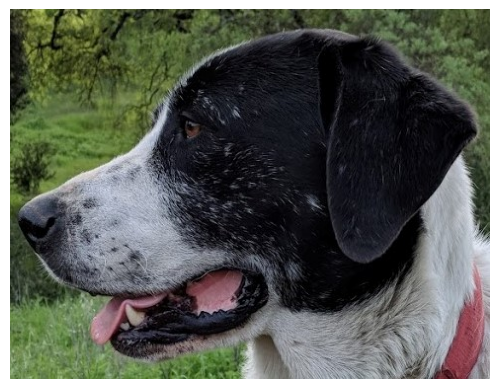

In [116]:
img = cv2.imread("./data/sammy_face.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

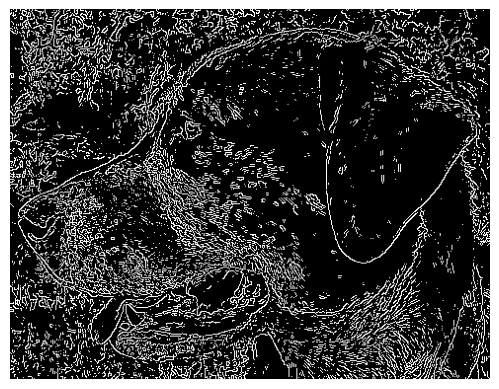

In [117]:
edges = cv2.Canny(img, threshold1=127, threshold2=127)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

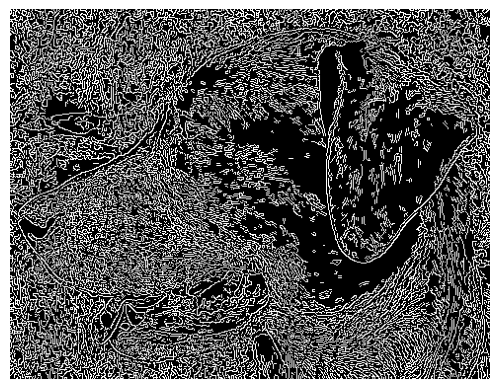

In [118]:
median_pixel_val = np.median(img)  # type: ignore
lower_bound = int(max(0, 0.7 * median_pixel_val))
upper_bound = int(min(255, 1.3 * median_pixel_val))

edges = cv2.Canny(img, threshold1=lower_bound, threshold2=upper_bound)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

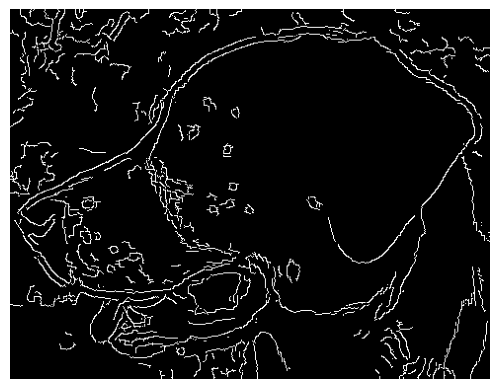

In [119]:
blur_img = cv2.blur(img, ksize=(7, 7))
edges = cv2.Canny(blur_img, threshold1=lower_bound, threshold2=upper_bound)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

## **4. Grid Detection**

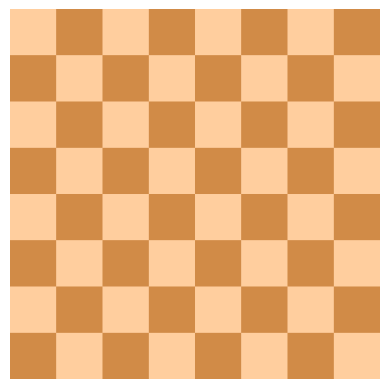

In [120]:
chess = cv2.imread("./data/flat_chessboard.png")
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
plt.imshow(chess)
plt.axis("off")
plt.show()

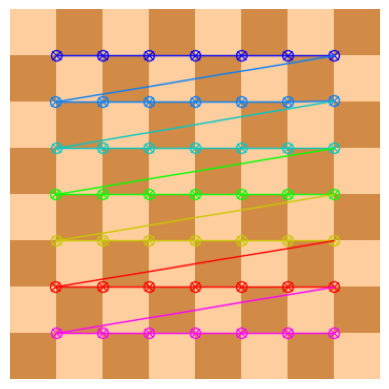

In [121]:
found, corners = cv2.findChessboardCorners(chess, patternSize=(7, 7))
cv2.drawChessboardCorners(
    chess,
    patternSize=(7, 7),
    corners=corners,
    patternWasFound=found,
)
plt.imshow(chess)
plt.axis("off")
plt.show()

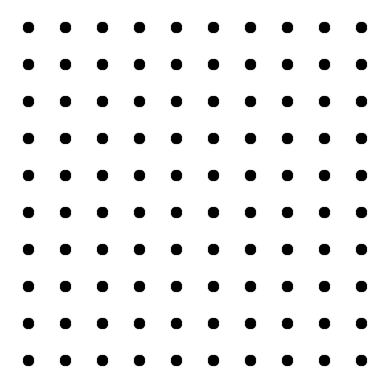

In [122]:
circles = cv2.imread("./data/dot_grid.png")
circles = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB)
plt.imshow(circles)
plt.axis("off")
plt.show()

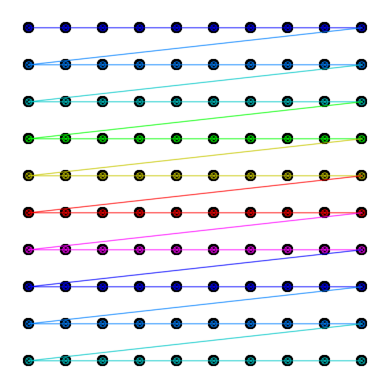

In [123]:
found, corners = cv2.findCirclesGrid(
    circles,
    patternSize=(10, 10),
    flags=cv2.CALIB_CB_SYMMETRIC_GRID,
)
cv2.drawChessboardCorners(
    circles,
    patternSize=(10, 10),
    corners=corners,
    patternWasFound=found,
)
plt.imshow(circles)
plt.axis("off")
plt.show()

## **5. Contour Detection**

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

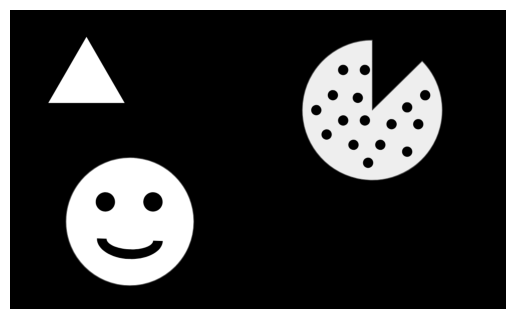

In [124]:
img = cv2.imread("./data/internal_external.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [125]:
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
hierarchy = np.squeeze(hierarchy)
hierarchy

array([[ 4, -1,  1, -1],
       [ 2, -1, -1,  0],
       [ 3,  1, -1,  0],
       [-1,  2, -1,  0],
       [21,  0,  5, -1],
       [ 6, -1, -1,  4],
       [ 7,  5, -1,  4],
       [ 8,  6, -1,  4],
       [ 9,  7, -1,  4],
       [10,  8, -1,  4],
       [11,  9, -1,  4],
       [12, 10, -1,  4],
       [13, 11, -1,  4],
       [14, 12, -1,  4],
       [15, 13, -1,  4],
       [16, 14, -1,  4],
       [17, 15, -1,  4],
       [18, 16, -1,  4],
       [19, 17, -1,  4],
       [20, 18, -1,  4],
       [-1, 19, -1,  4],
       [-1,  4, -1, -1]], dtype=int32)

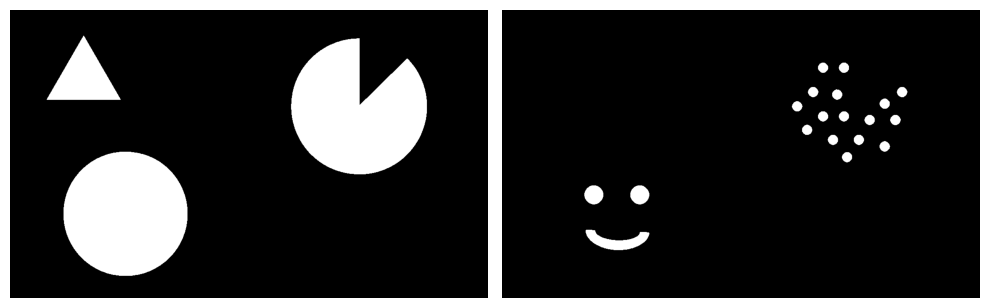

In [126]:
external_contours = np.zeros_like(img, dtype=np.uint8)
internal_contours = np.zeros_like(img, dtype=np.uint8)

for k in range(len(hierarchy)):
    if hierarchy[k, 3] == -1:  # External contour.
        cv2.drawContours(
            external_contours,
            contours,
            contourIdx=k,  # Index of the contour.
            color=(255, 0, 0),
            thickness=-1,
        )
    if not hierarchy[k, 3] == -1:  # Internal contour.
        cv2.drawContours(
            internal_contours,
            contours,
            contourIdx=k,  # Index of the contour.
            color=(255, 0, 0),
            thickness=-1,
        )

plt.figure(figsize=(10, 5), tight_layout=True)
plt.subplot(121)
plt.axis("off")
plt.imshow(external_contours, cmap="gray")
plt.subplot(122)
plt.imshow(internal_contours, cmap="gray")
plt.axis("off")
plt.show()

## **6. Feature Matching**

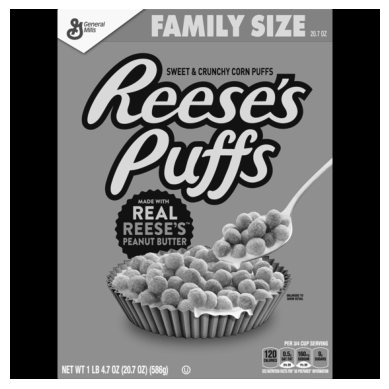

In [127]:
reeses = cv2.imread("./data/reeses_puffs.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(reeses, cmap="gray")
plt.axis("off")
plt.show()

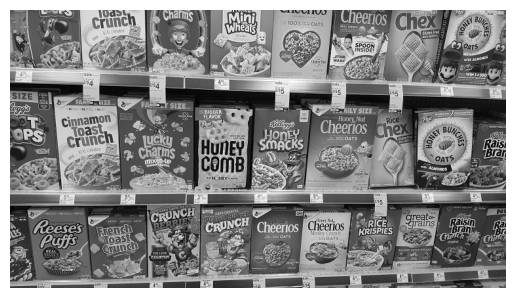

In [128]:
cereal = cv2.imread("./data/many_cereals.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(cereal, cmap="gray")
plt.axis("off")
plt.show()

### **6.1. ORB Descriptor**

In [129]:
orb = cv2.ORB.create()

kp1, des1 = orb.detectAndCompute(reeses, mask=None)  # type: ignore
kp2, des2 = orb.detectAndCompute(cereal, mask=None)  # type: ignore

bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(queryDescriptors=des1, trainDescriptors=des2)

In [130]:
single_match = matches[0]
single_match.distance, single_match.queryIdx, single_match.trainIdx, single_match.imgIdx

(56.0, 2, 284, 0)

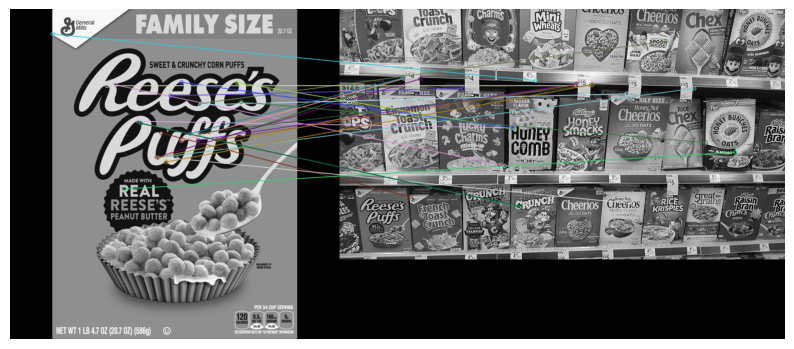

In [131]:
matches = sorted(matches, key=lambda x: x.distance)
reeses_matches = cv2.drawMatches(
    reeses, kp1, cereal, kp2, matches[:25], outImg=None, flags=2  # type: ignore
)
plt.figure(figsize=(10, 5))
plt.imshow(reeses_matches)
plt.axis("off")
plt.show()

### **6.2. SIFT Descriptor**

In [132]:
sift = cv2.SIFT.create()

kp1, des1 = sift.detectAndCompute(reeses, mask=None)  # type: ignore
kp2, des2 = sift.detectAndCompute(cereal, mask=None)  # type: ignore

bf = cv2.BFMatcher()
matches = bf.knnMatch(queryDescriptors=des1, trainDescriptors=des2, k=2)
matches[:3]


((< cv2.DMatch 000001F9EEA43190>, < cv2.DMatch 000001F98644BF90>),
 (< cv2.DMatch 000001F98644B150>, < cv2.DMatch 000001F98644B7F0>),
 (< cv2.DMatch 000001F98644B770>, < cv2.DMatch 000001F9864487F0>))

In [133]:
good_matches = list()

# Ratio test.
for match1, match2 in matches:
    if match1.distance < 0.5 * match2.distance:
        good_matches.append([match1])

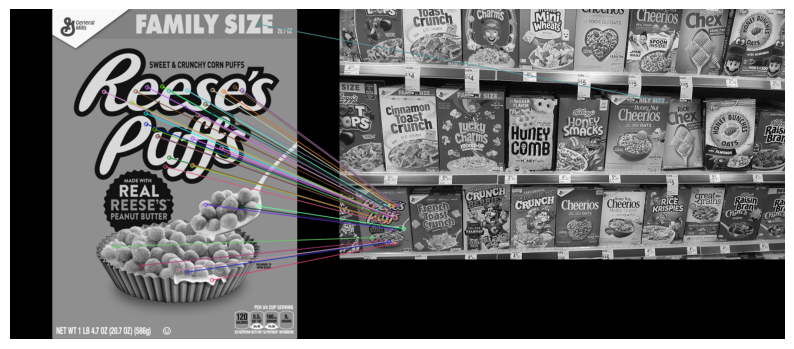

In [134]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereal, kp2, good_matches, outImg=None, flags=2)  # type: ignore
plt.figure(figsize=(10, 5))
plt.imshow(sift_matches)
plt.axis("off")
plt.show()

### **6.3. FLANN Matcher**

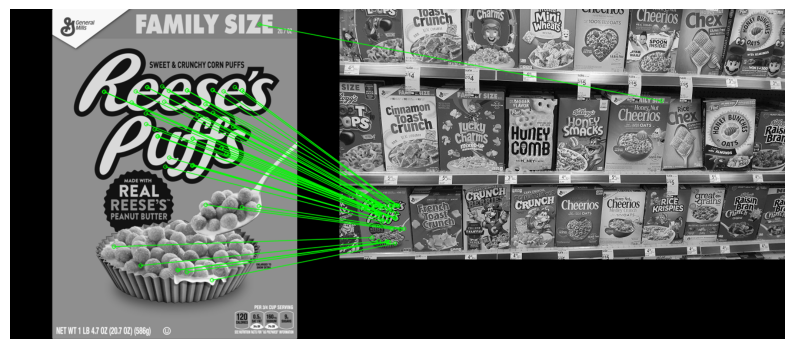

In [135]:
sift = cv2.SIFT.create()

kp1, des1 = sift.detectAndCompute(reeses, mask=None)  # type: ignore
kp2, des2 = sift.detectAndCompute(cereal, mask=None)  # type: ignore

# FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)  # type: ignore
matches = flann.knnMatch(queryDescriptors=des1, trainDescriptors=des2, k=2)
matches_mask = list([0, 0] for _ in range(len(matches)))

for k, (match1, match2) in enumerate(matches):
    if match1.distance < 0.5 * match2.distance:
        matches_mask[k] = [1, 0]

flann_matches = cv2.drawMatchesKnn(
    reeses,
    kp1,
    cereal,
    kp2,
    matches,
    outImg=None,  # type: ignore
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matches_mask,  # type: ignore
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)
plt.figure(figsize=(10, 5))
plt.imshow(flann_matches)
plt.axis("off")
plt.show()

## **7. Segmentation - Watershed Algorithm**

### **7.1. SImple Approach**

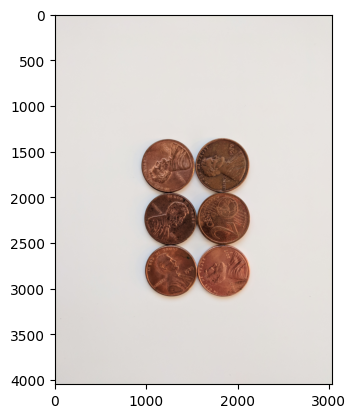

In [136]:
coins = cv2.imread("./data/pennies.jpg")
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
plt.imshow(coins)
plt.show()

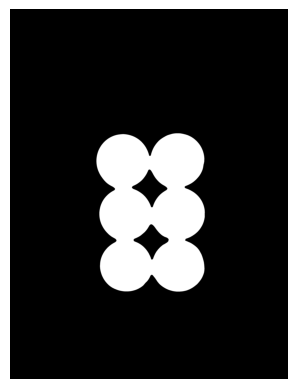

In [137]:
# 1. Blur the image.
# 2. Turn it into grayscale.
# 3. Binary threshold it.
# 4. Find contours.

b_coins = cv2.medianBlur(coins, ksize=33)
b_coins = cv2.cvtColor(b_coins, cv2.COLOR_BGR2GRAY)
ret, b_coins = cv2.threshold(b_coins, thresh=155, maxval=255, type=cv2.THRESH_BINARY_INV)

plt.imshow(b_coins, cmap="gray")
plt.axis("off")
plt.show()

In [138]:
contours, hierarchy = cv2.findContours(b_coins, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
hierarchy = np.squeeze(hierarchy)
hierarchy

array([[-1, -1,  1, -1],
       [ 2, -1, -1,  0],
       [-1,  1, -1,  0]], dtype=int32)

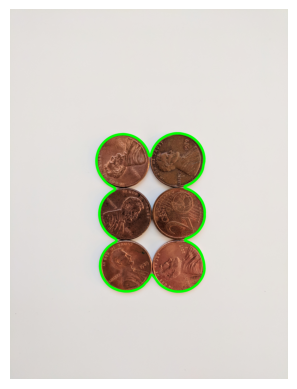

In [139]:
coins_copy = coins.copy()

for k in range(len(hierarchy)):
    if hierarchy[k, 3] == -1:  # External contour.
        cv2.drawContours(
            coins_copy,
            contours,
            contourIdx=k,  # Index of the contour.
            color=(0, 255, 0),
            thickness=25,
        )
        
plt.imshow(coins_copy)
plt.axis("off")
plt.show()

### **7.2. Watershed Algorithm**

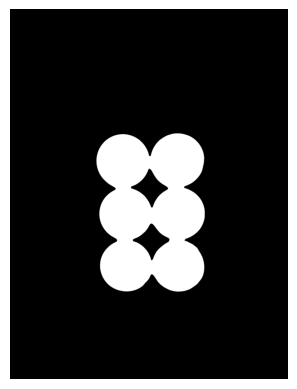

In [140]:
b_coins = cv2.medianBlur(coins, ksize=33)
b_coins = cv2.cvtColor(b_coins, cv2.COLOR_BGR2GRAY)
ret, b_coins = cv2.threshold(
    b_coins,
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU,
)

plt.imshow(b_coins, cmap="gray")
plt.axis("off")
plt.show()

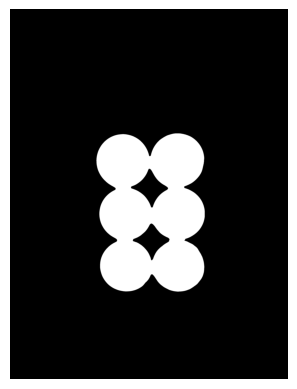

In [141]:
# Remove noise (optional but common for more comples images).
b_coins = cv2.morphologyEx(b_coins, op=cv2.MORPH_OPEN, kernel=np.ones((7, 7), np.uint8))
plt.imshow(b_coins, cmap="gray")
plt.axis("off")
plt.show()

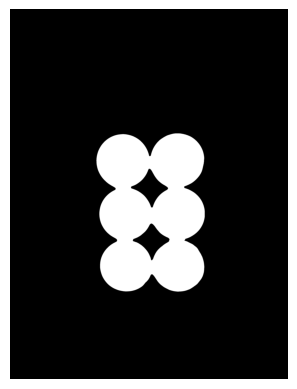

In [142]:
background = cv2.dilate(b_coins, kernel=np.ones((7, 7), np.uint8))
plt.imshow(b_coins, cmap="gray")
plt.axis("off")
plt.show()

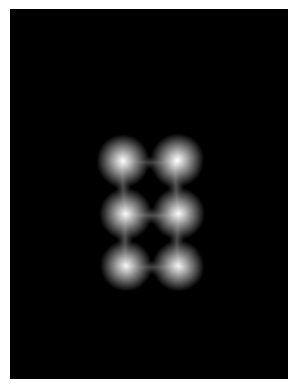

In [143]:
dst = cv2.distanceTransform(b_coins, distanceType=cv2.DIST_L2, maskSize=5)
plt.imshow(dst, cmap="gray")
plt.axis("off")
plt.show()

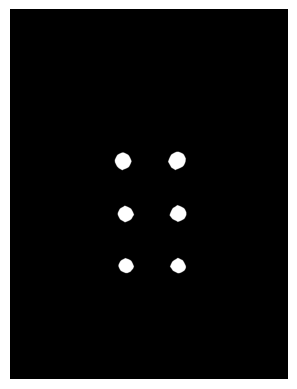

In [144]:
ret, foreground = cv2.threshold(dst, thresh=0.7 * dst.max(), maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(foreground, cmap="gray")
plt.axis("off")
plt.show()

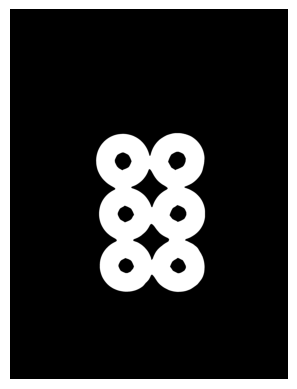

In [145]:
foreground = foreground.astype(np.uint8)
background = background.astype(np.uint8)
unknown = cv2.subtract(background, foreground)

plt.imshow(unknown, cmap="gray")
plt.axis("off")
plt.show()

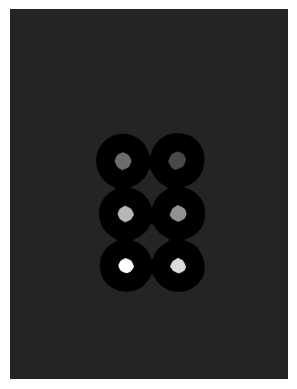

In [146]:
ret, markers = cv2.connectedComponents(foreground)
markers = markers + 1  # type: ignore
markers[unknown == 255] = 0

plt.imshow(markers, cmap="gray")
plt.axis("off")
plt.show()

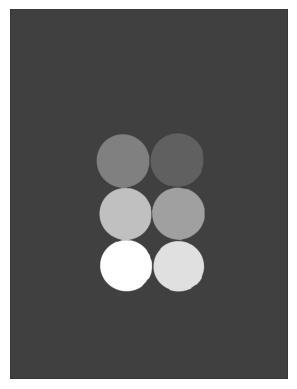

In [147]:
markers = cv2.watershed(coins, markers)
plt.imshow(markers, cmap="gray")
plt.axis("off")
plt.show()

In [148]:
contours, hierarchy = cv2.findContours(markers, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
hierarchy = np.squeeze(hierarchy)
hierarchy

array([[ 1, -1, -1, -1],
       [ 2,  0, -1, -1],
       [ 3,  1, -1, -1],
       [ 4,  2, -1, -1],
       [ 5,  3, -1, -1],
       [ 6,  4, -1, -1],
       [ 7,  5, -1, -1],
       [ 8,  6, -1, -1],
       [ 9,  7, -1, -1],
       [10,  8, -1, -1],
       [-1,  9, -1, -1]], dtype=int32)

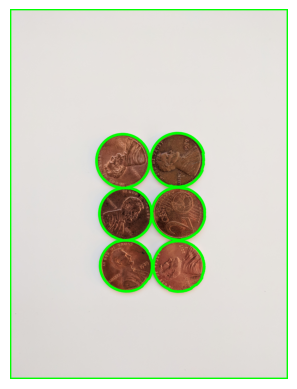

In [149]:
coins_copy = coins.copy()

for k in range(len(hierarchy)):
    if hierarchy[k, 3] == -1:  # External contour.
        cv2.drawContours(
            coins_copy,
            contours,
            contourIdx=k,  # Index of the contour.
            color=(0, 255, 0),
            thickness=25,
        )
        
plt.imshow(coins_copy)
plt.axis("off")
plt.show()

### **7.3. Watershed Algorithm - Interactive**

In [150]:
road = cv2.imread("./data/road_image.jpg")
road_copy = road.copy()

marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros_like(road)

In [151]:
from matplotlib import cm

colors = np.array(cm.tab10.colors) * 255  # type: ignore
colors

array([[ 31., 119., 180.],
       [255., 127.,  14.],
       [ 44., 160.,  44.],
       [214.,  39.,  40.],
       [148., 103., 189.],
       [140.,  86.,  75.],
       [227., 119., 194.],
       [127., 127., 127.],
       [188., 189.,  34.],
       [ 23., 190., 207.]])

In [155]:
current_marker = 1
marks_updated = False

def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(len(colors)):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()